## Visualize an example simulation as it moves towards equilibrium

In [1]:
import numpy as np
import pandas as pd
import os

from lib.plotting import *
from lib.response import *
from lib.preferences import *

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
import matplotlib.patches as patches
import seaborn as sns

import matplotlib.gridspec as gridspec

# inline stylization
%matplotlib inline
sns.set_style("ticks")
sns.set_style("white")

plt.rcParams["figure.dpi"] = 100
plt.rcParams["savefig.dpi"] = 150
plt.rcParams["xtick.bottom"] = True
plt.rcParams["ytick.left"] = True

In [3]:
# Font sizes
plt.rc('font', size=12)         # controls default text sizes
plt.rc('axes', titlesize=14)    # fontsize of the axes title
plt.rc('axes', labelsize=14)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=12)    # fontsize of the tick labels
plt.rc('ytick', labelsize=12)    # fontsize of the tick labels
plt.rc('legend', fontsize=12)    # legend fontsize

## Settings

In [4]:
savefig = True
output_dir = "../figs/review"

## Preferences

In [5]:
analysis_metrics = ["HX", "VX", 
                    'frac_mixed_samples','mean_k',
                    'n_segregating','pi','theta',
                    'avg_frac_ibd', 'avg_n_ibd','avg_l_ibd']

In [6]:
genetic_names.update({
    "mean_k": "C.O.I ($k$)",
    "pi": "Nucl. Diversity ($\pi$)",
    "avg_l_ibd": "Avg. IBD\nTrack Length (bp)"
})

In [7]:
time_limits = (0, 365*50)

In [8]:
time_limits

(0, 18250)

## Load Simulation

In [9]:
sim_path = "../results/2021-02-10_equilibrate/sim_equilibrate-base_0001/"

In [10]:
# Load full data frame
epoch_df = pd.read_csv(os.path.join(sim_path, "epoch_df.csv"))
epoch_df.index = epoch_df.name
og = pd.read_csv(os.path.join(sim_path, "og.csv"))
op = pd.read_csv(os.path.join(sim_path, "op.csv"))

# Merge on time
ot = pd.merge(left=op, right=og, on="t0")

In [11]:
epoch_df

,name,t0,t1,param,val,x_h,x_v
name,,,,,,,
init,init,0,18250,NaN,NaN,0.4,0.047619
Hold,Hold,18250,21900,['eta'],[0.2],0.4,0.047619


## Plot

### Prevalence

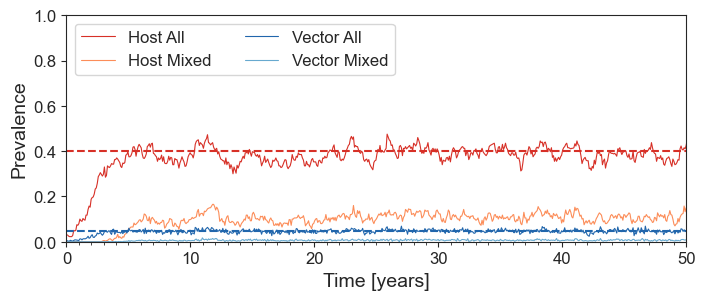

In [12]:
fig, ax = plt.subplots(1, 1, figsize=(8, 3))

prevalence_trajectory_plot(ot, epoch_df, ax,
                           col_dt=prevalence_col_dt,
                           norm_t0=None,
                           indicate_epochs=None,
                           indicate_equilibriums=None,
                           time_limits=time_limits,
                           years_per_major_tick=10)

ax.axhline(epoch_df.loc["Hold", "x_h"], linestyle="dashed", color=prevalence_col_dt["HX"])
ax.axhline(epoch_df.loc["Hold", "x_v"], linestyle="dashed", color=prevalence_col_dt["VX"])
ax.set_xlabel("Time [years]")
ax.set_ylabel("Prevalence")
ax.legend(loc="upper left", ncol=2)

if savefig:
    fig.savefig(os.path.join(output_dir, "sec1_equilibrium-prevalence.png"), bbox_inches="tight", pad_inches=0.5)
    fig.savefig(os.path.join(output_dir, "sec1_equilibrium-prevalence.pdf"), bbox_inches="tight", pad_inches=0.5)

### Genetics

In [13]:
metrics = ["mean_k", "frac_mixed_samples", "pi", "tajd", "f_ibd", "l_ibd", "n_segregating", "n_singletons"]
n_metrics = len(metrics)

In [14]:
genetic_names.update({"l_ibd": "Avg. IBD Track Length (bp)"})

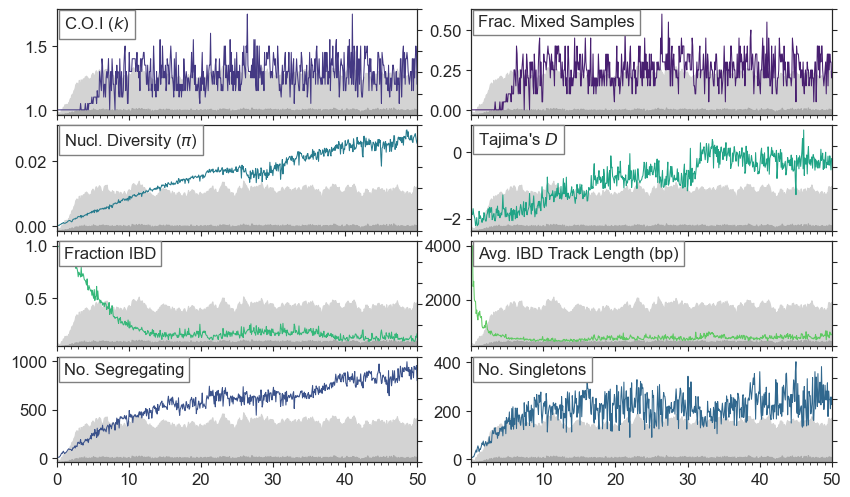

In [15]:
fig, axes = plt.subplots(int(n_metrics/2), 2, figsize=(10, 6), sharex=True)
fig.subplots_adjust(hspace=0.1, wspace=0.15)

for ax, metric in zip(axes.flatten(), metrics):
    
    # Raw
    genetic_trajectory_plot(metric, ot, epoch_df,
                            tight_metric_col_dt[metric], ax,
                            norm_t0=None,
                            indicate_epochs=None,
                            time_limits=time_limits,
                            years_per_major_tick=10)
    
    if metric == "avg_l_ibd":
        ax.set_ylim((0, 150))

    # y
    #ax.set_ylabel(genetic_names[metric], fontsize=12)
    #ax.set_title(genetic_names[metric], fontsize=12, loc="left")
    ax.annotate(text=genetic_names[metric], xy=(0.02, 0.95), xycoords="axes fraction", 
                ha="left", va="top",
                bbox=dict(boxstyle="square", fc="white", ec="grey", lw=1))
    
if savefig:
    fig.savefig(os.path.join(output_dir, "sec1_equilibrium-genetics.png"), bbox_inches="tight", pad_inches=0.5)
    fig.savefig(os.path.join(output_dir, "sec1_equilibrium-genetics.pdf"), bbox_inches="tight", pad_inches=0.5)